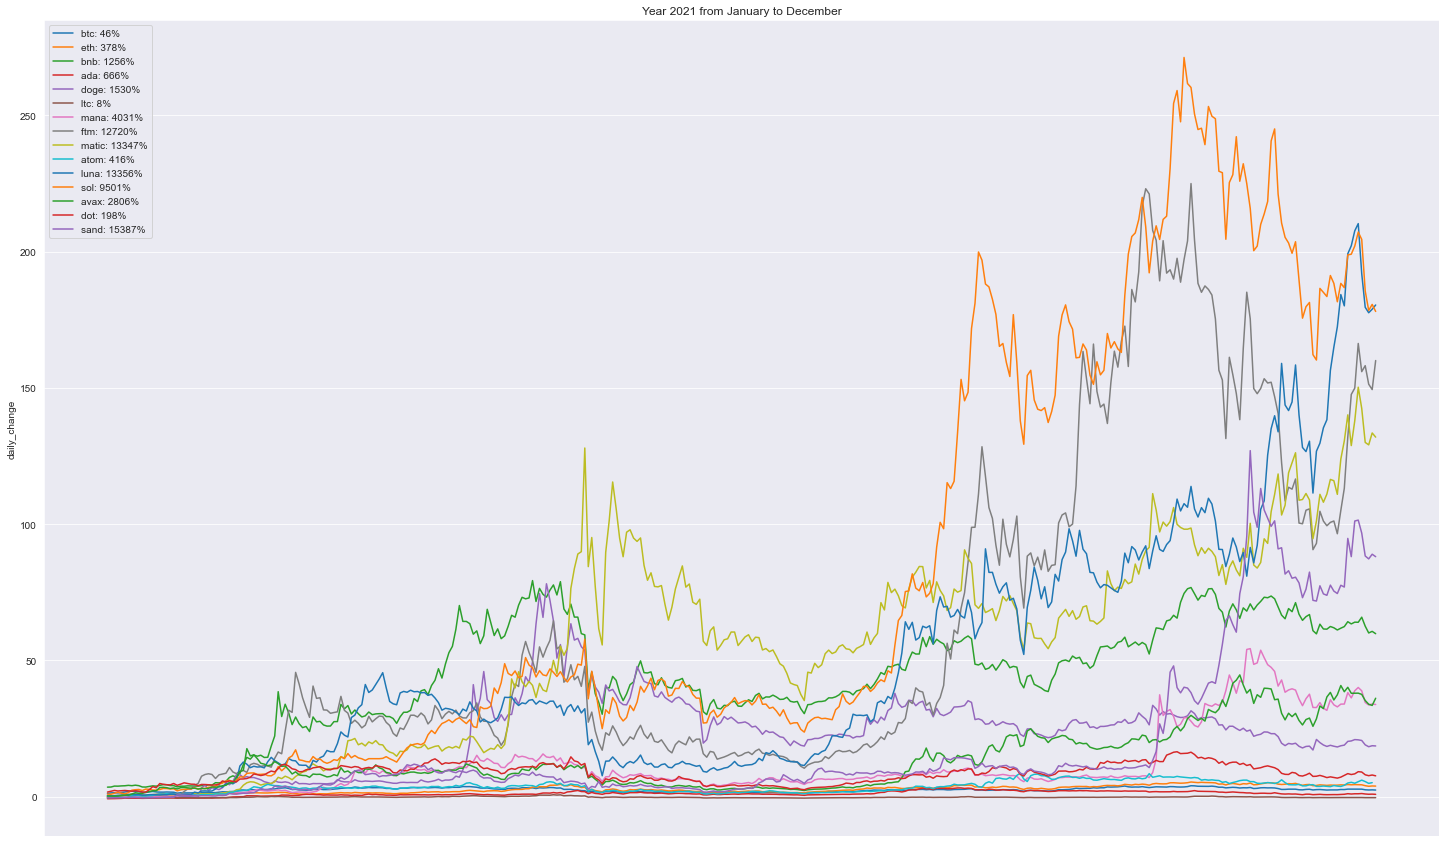

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

scope = pd.read_csv(r"/Users/fernandoseguias/Desktop/ferseg/Proyectos/Programacion/iron_hack/project_1/output/scope.csv")

tickers = scope["coin"].unique()
dict_tickers = {}

for key in tickers.tolist():
    dict_tickers[key] = key
    dict_tickers[key] = scope.loc[scope.coin == key]

stable_coins = ["usdt", "usdc", "dai", "busd", "ust"]
top_15 = ['btc', 'eth', 'bnb', 'ada', 'doge', 'ltc', 'mana', 'ftm', 'matic', 'atom', 'luna', 'sol', 'avax', 'dot', 'sand']

fig, axes = plt.subplots(1, 1, figsize=(25, 15), sharex=False, sharey=False)

for i in top_15:
    df = dict_tickers[i].reset_index()

    daily_change = []

    for index, row in df.iterrows():
        
        curr_price = row[8]
        prev_row = index - 1
        
        if prev_row < 0:
            daily_change.append(0)
        else:
            prev_price = df.iloc[0, 8]
            daily_change.append((curr_price - prev_price) / prev_price)

    df['daily_change'] = daily_change
    df['acum_daily_change'] = df['daily_change'].cumsum()

    initial_price = df["close"].loc[df["date"] == "02/01/2021"].item()
    final_price = df["close"].loc[df["date"] == "30/12/2021"].item()
    increase_decrease = int(((final_price - initial_price) / initial_price) * 100)

    fig = sns.lineplot(data=df.loc[df["year"] == 2021], x="date", y="daily_change", label=f'{i}: {increase_decrease}%')
axes.get_xaxis().set_visible(False)
axes.title.set_text('Year 2021 from January to December')